In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio

import statsmodels.api as sm

from sklearn import linear_model, model_selection, metrics, preprocessing, decomposition, cluster
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/2022_SFC_IDSP/Project Dry Beans Dataset/'
results_path='/content/drive/My Drive/2022_SFC_IDSP/Project Dry Beans Dataset/'

Mounted at /content/drive/


In [3]:
db= pd.read_excel(data_path+'Dry_Beans_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
db.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
db =db.astype({'Class':'category'})
#db.dtypes

In [5]:
db_ml_Std= pd.read_csv(data_path+'db_ml_Std.csv')
db_ml_Std.head()

,StdScl_Area,StdScl_Perimeter,StdScl_MajorAxisLength,StdScl_MinorAxisLength,StdScl_Eccentricity,StdScl_ConvexArea,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-2.185720,-0.841451,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-3.686040,-0.826102,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-2.045336,-0.808704,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-2.742211,-0.773975,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-4.535028,-0.784286,SEKER


# Univariate Logistic Regression

In [6]:
db_ml_Std.columns

Index(['StdScl_Area', 'StdScl_Perimeter', 'StdScl_MajorAxisLength',
       'StdScl_MinorAxisLength', 'StdScl_Eccentricity', 'StdScl_ConvexArea',
       'Class'],
      dtype='object')

In [7]:
X= db_ml_Std['StdScl_Area'].values
#use logic to find all the places where the species is Gentoo == 1, rest are ==0
y= (db_ml_Std['Class']=='BOMBAY').astype('int').values

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X.reshape(-1,1), y)

LogisticRegression(random_state=42, solver='liblinear')

In [9]:
X_new = np.linspace(0.95*np.min(X), 1.25*np.max(X), 1200).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [10]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([2.29091465])

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


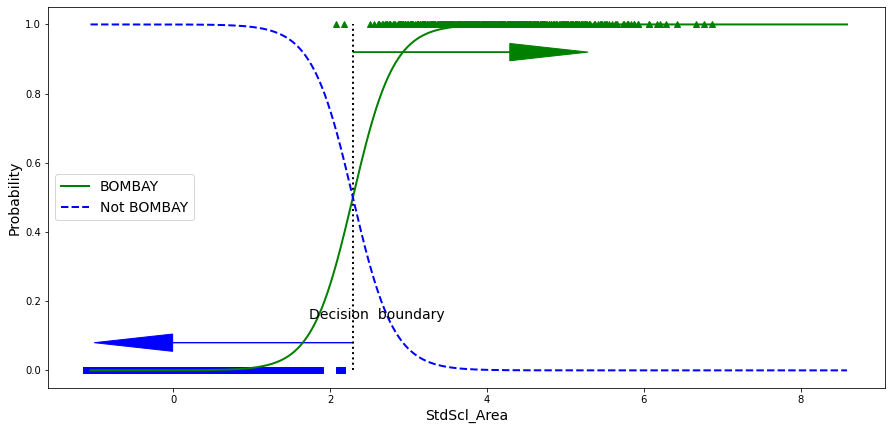

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary,decision_boundary],[0,1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="BOMBAY")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not BOMBAY")
plt.text(decision_boundary+0.3, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -2.3, 0, head_width=0.05, head_length=1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 2, 0, head_width=0.05, head_length=1, fc='g', ec='g')
plt.xlabel("StdScl_Area", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 3, -0.02, 1.02])

plt.savefig(data_path+'decision_boundary_StdScl_Area.pdf')
plt.savefig(data_path+'decision_boundarys_StdScl_Area.png')

plt.show()

In [12]:
print(log_reg.predict([[2.28], [2.30]]))
print(log_reg.predict_proba([[2.28], [2.30]]))


[0 1]
[[0.50920167 0.49079833]
 [0.49008342 0.50991658]]


# Multivariate binary classifaction

## Area & Eccentricity /BOMBAY

In [13]:
X_multi= db_ml_Std[['StdScl_Area','StdScl_Eccentricity']].values

y= (db_ml_Std['Class']=='BOMBAY').astype('int').values

In [14]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi, y)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

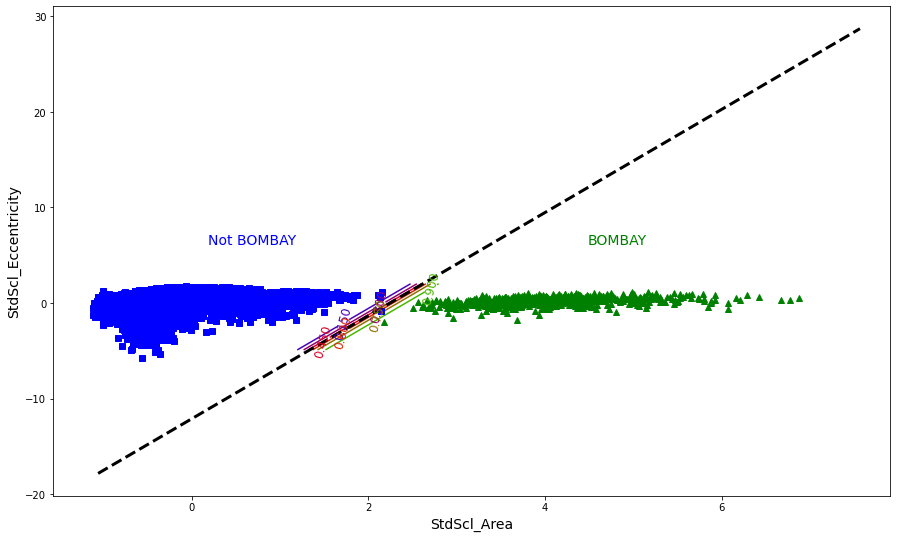

In [15]:
x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 9))
plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.1*np.max(X_multi[:,0]), 3.5*np.max(X_multi[:,1]), "Not BOMBAY", fontsize=14, color="b", ha="center")
plt.text(0.70*np.max(X_multi[:,0]), 3.5*np.max(X_multi[:,1]), "BOMBAY", fontsize=14, color="g", ha="center")
plt.ylabel("StdScl_Eccentricity", fontsize=14)
plt.xlabel("StdScl_Area", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])


plt.show()

In [16]:
train, test =  model_selection.train_test_split(db_ml_Std, test_size=0.25,random_state=300, shuffle=True)

In [17]:
X_multi_train= train[['StdScl_Area','StdScl_Eccentricity']].values

y_train= (train['Class']=='BOMBAY').astype('int').values

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi_train, y_train)


X_multi_test= test[['StdScl_Area','StdScl_Eccentricity']].values

y_proba = log_reg.predict_proba(X_multi_test)
y_predict = log_reg.predict(X_multi_test)

y_test=(test['Class']=='BOMBAY').astype('int').values

overall_score= log_reg.score(X_multi_test, y_test)
print('overall accuracy = {}'.format(overall_score))

overall accuracy = 1.0


[[3283    0]
 [   0  120]]


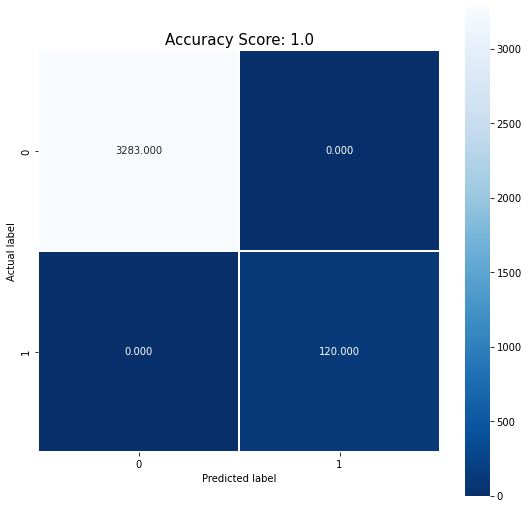

In [18]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);
#plt.savefig('Penguins_species_ConfusionSeabornCodementor.png')

overall accuracy = 1.0
[[3283    0]
 [   0  120]]


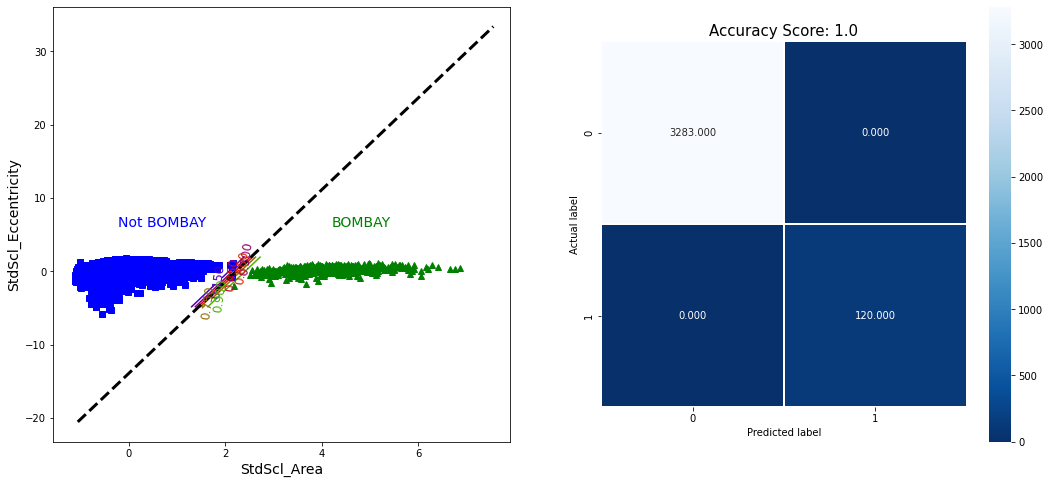

In [19]:
x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

fig= plt.figure(figsize=(18,8))

fig.add_subplot(1,2,1)

plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.1*np.max(X_multi[:,0]), 3.5*np.max(X_multi[:,1]), "Not BOMBAY", fontsize=14, color="b", ha="center")
plt.text(0.70*np.max(X_multi[:,0]), 3.5*np.max(X_multi[:,1]), "BOMBAY", fontsize=14, color="g", ha="center")
plt.ylabel("StdScl_Eccentricity", fontsize=14)
plt.xlabel("StdScl_Area", fontsize=14)

train, test =  model_selection.train_test_split(db_ml_Std, test_size=0.25,random_state=300, shuffle=True)
X_multi_train= train[['StdScl_Area','StdScl_Eccentricity']].values

y_train= (train['Class']=='BOMBAY').astype('int').values

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi_train, y_train)


X_multi_test= test[['StdScl_Area','StdScl_Eccentricity']].values

y_proba = log_reg.predict_proba(X_multi_test)
y_predict = log_reg.predict(X_multi_test)

y_test=(test['Class']=='BOMBAY').astype('int').values

overall_score= log_reg.score(X_multi_test, y_test)
print('overall accuracy = {}'.format(overall_score))

cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

fig.add_subplot(1,2,2)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);



plt.savefig(data_path+'mvBinClass_Area_Eccentricity_BOMBAY.pdf')
plt.savefig(data_path+'mvBinClass_Area_Eccentricity_BOMBAY.png')

## Area & Eccentricity /DERMASON

In [20]:
X_multi= db_ml_Std[['StdScl_Area','StdScl_Eccentricity']].values

y= (db_ml_Std['Class']=='DERMASON').astype('int').values

In [21]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi, y)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

Text(0.5, 0, 'StdScl_Area')

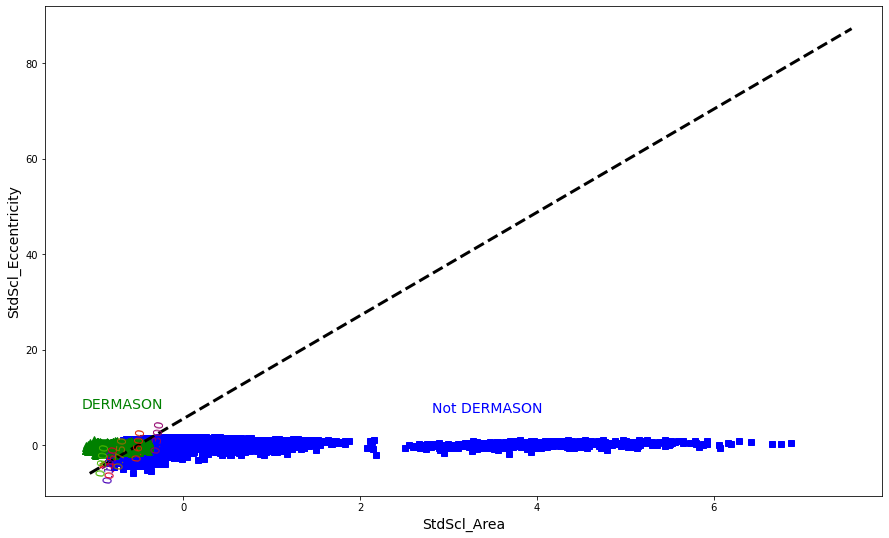

In [22]:
x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 9))
plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.5*np.max(X_multi[:,0]), 4.0*np.max(X_multi[:,1]), "Not DERMASON", fontsize=14, color="b", ha="center")
plt.text(-0.1*np.max(X_multi[:,0]), 4.5*np.max(X_multi[:,1]), "DERMASON", fontsize=14, color="g", ha="center")
plt.ylabel("StdScl_Eccentricity", fontsize=14)
plt.xlabel("StdScl_Area", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])

In [23]:
train, test =  model_selection.train_test_split(db_ml_Std, test_size=0.25,random_state=300, shuffle=True)

In [24]:
X_multi_train= train[['StdScl_Area','StdScl_Eccentricity']].values

y_train= (train['Class']=='DERMASON').astype('int').values

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi_train, y_train)


X_multi_test= test[['StdScl_Area','StdScl_Eccentricity']].values

y_proba = log_reg.predict_proba(X_multi_test)
y_predict = log_reg.predict(X_multi_test)

y_test=(test['Class']=='DERMASON').astype('int').values

overall_score= log_reg.score(X_multi_test, y_test)
print('overall accuracy = {}'.format(overall_score))

overall accuracy = 0.9365265941816044


[[2405   86]
 [ 130  782]]


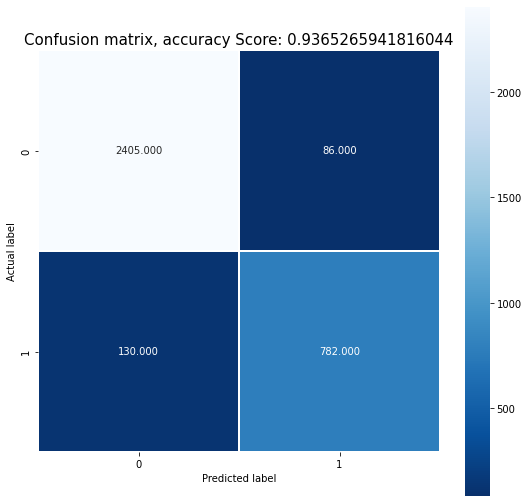

In [25]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix, accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);
#plt.savefig('Penguins_species_ConfusionSeabornCodementor.png')

overall accuracy = 0.9365265941816044
[[2405   86]
 [ 130  782]]


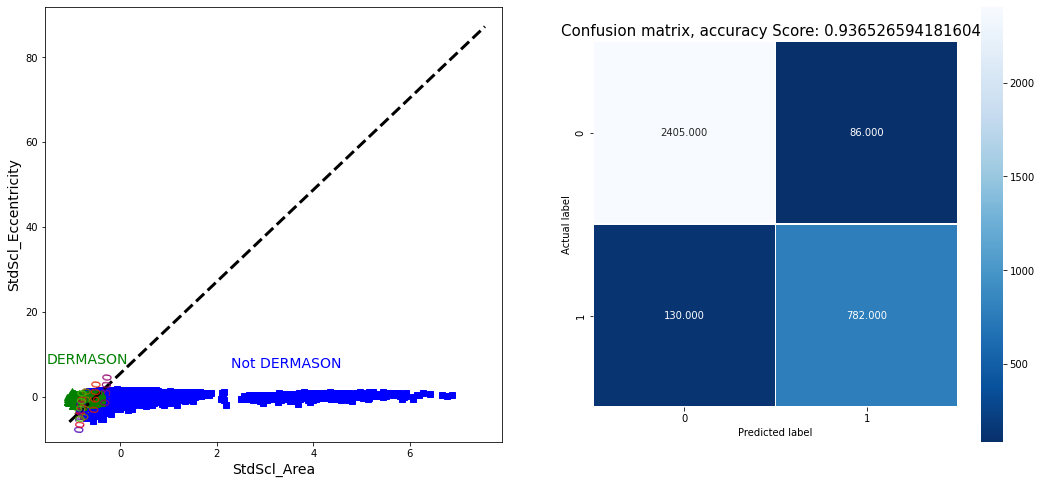

In [26]:

x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

fig= plt.figure(figsize=(18,8))
fig.add_subplot(1,2,1)

plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.5*np.max(X_multi[:,0]), 4.0*np.max(X_multi[:,1]), "Not DERMASON", fontsize=14, color="b", ha="center")
plt.text(-0.1*np.max(X_multi[:,0]), 4.5*np.max(X_multi[:,1]), "DERMASON", fontsize=14, color="g", ha="center")
plt.ylabel("StdScl_Eccentricity", fontsize=14)
plt.xlabel("StdScl_Area", fontsize=14)

X_multi_train= train[['StdScl_Area','StdScl_Eccentricity']].values
y_train= (train['Class']=='DERMASON').astype('int').values
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi_train, y_train)
X_multi_test= test[['StdScl_Area','StdScl_Eccentricity']].values
y_proba = log_reg.predict_proba(X_multi_test)
y_predict = log_reg.predict(X_multi_test)
y_test=(test['Class']=='DERMASON').astype('int').values
overall_score= log_reg.score(X_multi_test, y_test)
print('overall accuracy = {}'.format(overall_score))

cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

fig.add_subplot(1,2,2)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix, accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);

plt.savefig(data_path+'mvBinClass_Area_Eccentricity_DERMASON.pdf')
plt.savefig(data_path+'mvBinClass_Area_Eccentricity_DERMASON.png')



## Area & Eccentricity /SEKER

In [27]:
X_multi= db_ml_Std[['StdScl_Area','StdScl_Eccentricity']].values

y= (db_ml_Std['Class']=='SEKER').astype('int').values

In [28]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi, y)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

Text(0.5, 0, 'StdScl_Area')

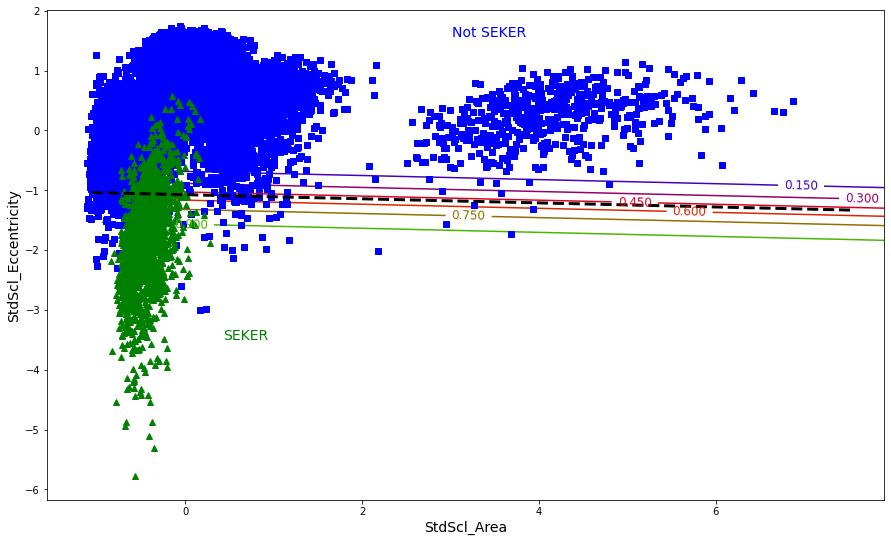

In [29]:
x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 9))
plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.5*np.max(X_multi[:,0]), 0.9*np.max(X_multi[:,1]), "Not SEKER", fontsize=14, color="b", ha="center")
plt.text(0.1*np.max(X_multi[:,0]), -2.0*np.max(X_multi[:,1]), "SEKER", fontsize=14, color="g", ha="center")
plt.ylabel("StdScl_Eccentricity", fontsize=14)
plt.xlabel("StdScl_Area", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])

In [30]:
train, test =  model_selection.train_test_split(db_ml_Std, test_size=0.25,random_state=300, shuffle=True)

In [31]:
X_multi_train= train[['StdScl_Area','StdScl_Eccentricity']].values

y_train= (train['Class']=='SEKER').astype('int').values

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi_train, y_train)


X_multi_test= test[['StdScl_Area','StdScl_Eccentricity']].values

y_proba = log_reg.predict_proba(X_multi_test)
y_predict = log_reg.predict(X_multi_test)

y_test=(test['Class']=='SEKER').astype('int').values

overall_score= log_reg.score(X_multi_test, y_test)
print('overall accuracy = {}'.format(overall_score))

overall accuracy = 0.9632677049662063


[[2862   52]
 [  73  416]]


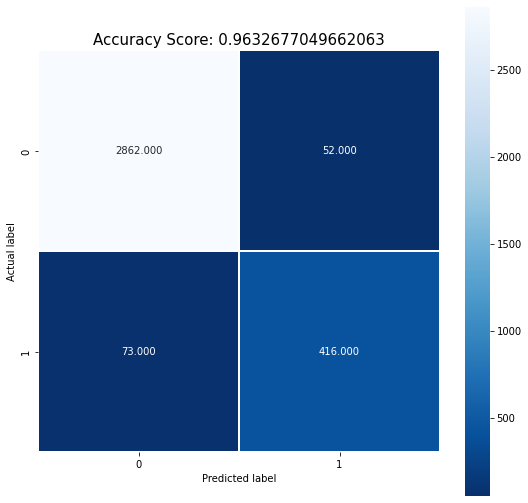

In [32]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);
#plt.savefig('Penguins_species_ConfusionSeabornCodementor.png')

[[2862   52]
 [  73  416]]


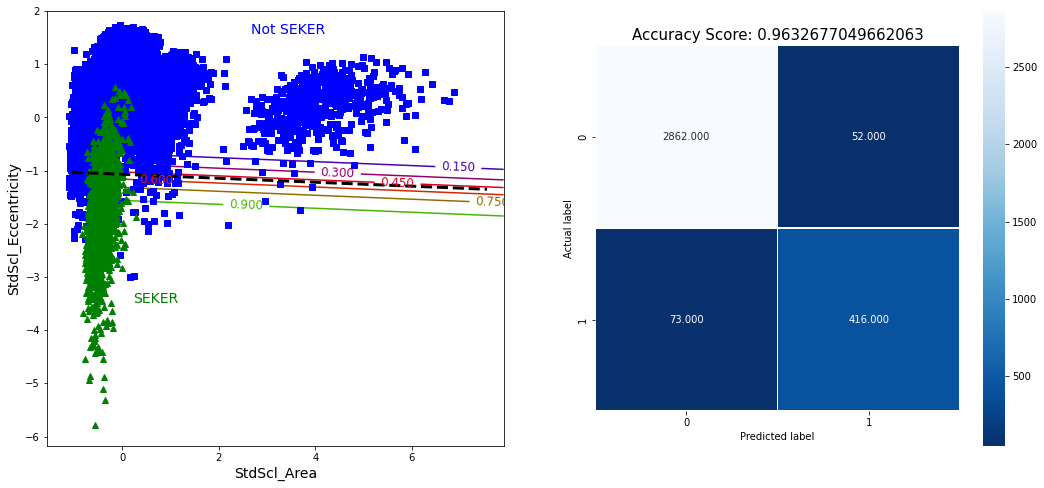

In [33]:
x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

fig= plt.figure(figsize=(18,8))

fig.add_subplot(1,2,1)

plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.5*np.max(X_multi[:,0]), 0.9*np.max(X_multi[:,1]), "Not SEKER", fontsize=14, color="b", ha="center")
plt.text(0.1*np.max(X_multi[:,0]), -2.0*np.max(X_multi[:,1]), "SEKER", fontsize=14, color="g", ha="center")
plt.ylabel("StdScl_Eccentricity", fontsize=14)
plt.xlabel("StdScl_Area", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])


cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

fig.add_subplot(1,2,2)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);

plt.savefig(data_path+'mvBinClass_Area_Eccentricity_SEKER.pdf')
plt.savefig(data_path+'mvBinClass_Area_Eccentricity_SEKER.png')

### Softmax

In [34]:
db_ml_Std.columns

Index(['StdScl_Area', 'StdScl_Perimeter', 'StdScl_MajorAxisLength',
       'StdScl_MinorAxisLength', 'StdScl_Eccentricity', 'StdScl_ConvexArea',
       'Class'],
      dtype='object')

In [35]:
list(db_ml_Std.keys())

['StdScl_Area',
 'StdScl_Perimeter',
 'StdScl_MajorAxisLength',
 'StdScl_MinorAxisLength',
 'StdScl_Eccentricity',
 'StdScl_ConvexArea',
 'Class']

In [36]:
X = db_ml_Std[['StdScl_Area','StdScl_Eccentricity']]  # StdScl_Area,StdScl_Eccentricity
y = db_ml_Std['Class']

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

# Unsupervised Machine Learning


## Covarience

### Area & Eccentricity

In [37]:
#create the correlation matrix
cm = db_ml_Std[['StdScl_Area','StdScl_Eccentricity']].corr()

#perform a linear fit
lin_reg_mdl=linear_model.LinearRegression()
X=db_ml_Std['StdScl_Area'].values.reshape(-1,1)
y=db_ml_Std['StdScl_Eccentricity']
lin_reg_mdl.fit(X,y)
y_fit=lin_reg_mdl.predict(X)

mean_area=db_ml_Std['StdScl_Area'].mean()
mean_ecc=db_ml_Std['StdScl_Eccentricity'].mean()


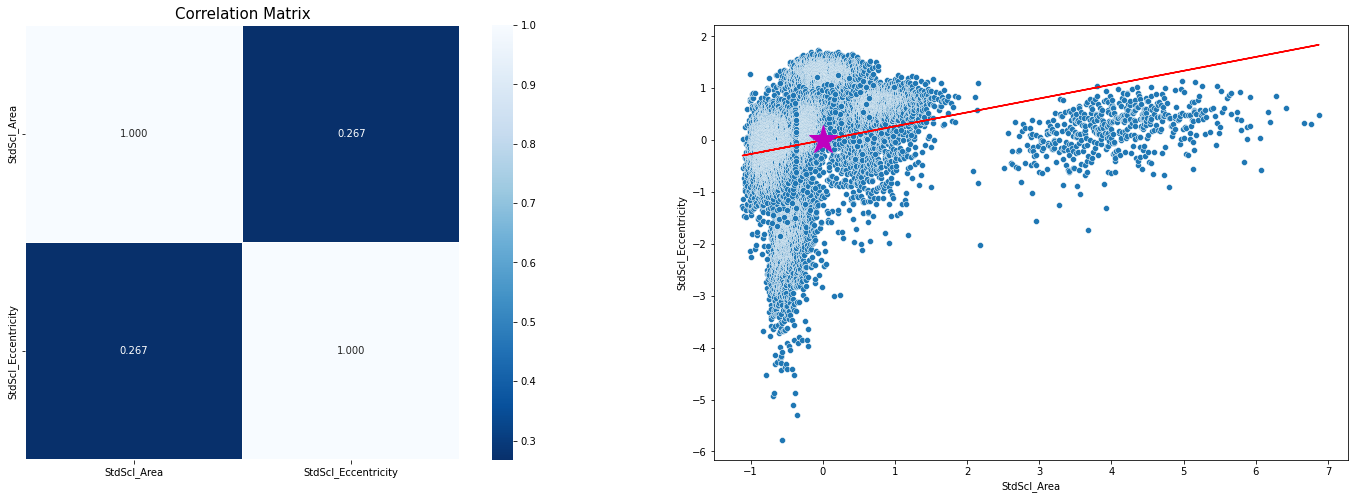

In [38]:
fig= plt.figure(figsize=(25,8))

fig.add_subplot(1,2,2)

sns.scatterplot(data=db_ml_Std, x='StdScl_Area', y='StdScl_Eccentricity')
plt.plot(X,y_fit, color='red', )
plt.plot(mean_area,mean_ecc, color='m',marker='*', markersize=30)

fig.add_subplot(1,2,1)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);

### Area & MajorAxisLength

In [39]:
db_ml_Std.columns

Index(['StdScl_Area', 'StdScl_Perimeter', 'StdScl_MajorAxisLength',
       'StdScl_MinorAxisLength', 'StdScl_Eccentricity', 'StdScl_ConvexArea',
       'Class'],
      dtype='object')

In [40]:
#create the correlation matrix
cm = db_ml_Std[['StdScl_Area','StdScl_MajorAxisLength']].corr()

#perform a linear fit
lin_reg_mdl=linear_model.LinearRegression()
X=db_ml_Std['StdScl_Area'].values.reshape(-1,1)
y=db_ml_Std['StdScl_MajorAxisLength']
lin_reg_mdl.fit(X,y)
y_fit=lin_reg_mdl.predict(X)

mean_area=db_ml_Std['StdScl_Area'].mean()
mean_mj=db_ml_Std['StdScl_MajorAxisLength'].mean()

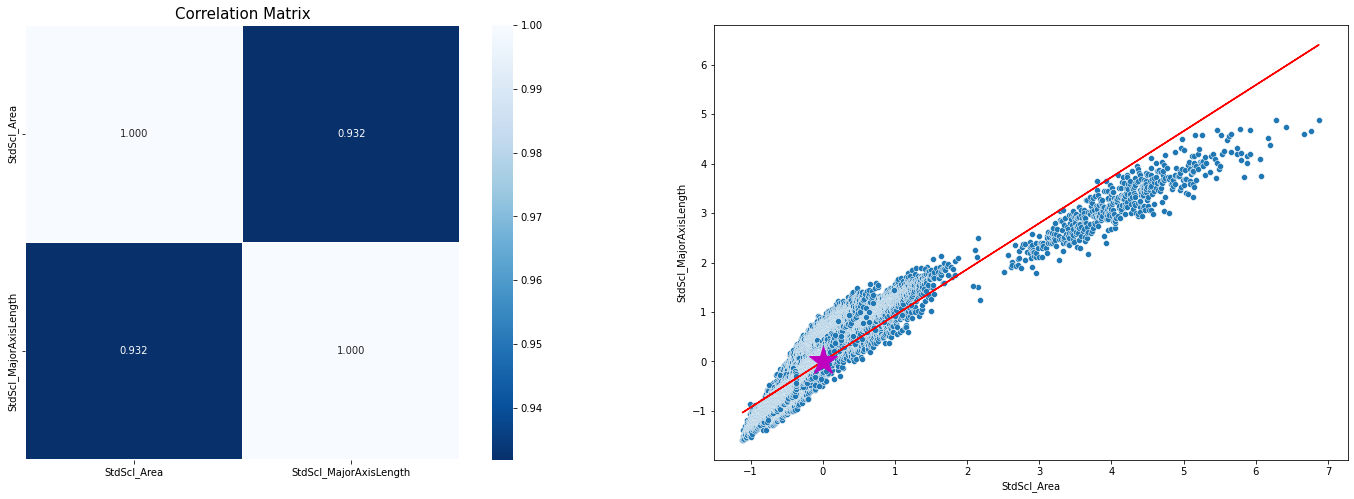

In [41]:
fig= plt.figure(figsize=(25,8))

fig.add_subplot(1,2,2)

sns.scatterplot(data=db_ml_Std, x='StdScl_Area', y='StdScl_MajorAxisLength')
plt.plot(X,y_fit, color='red', )
plt.plot(mean_area,mean_mj, color='m',marker='*', markersize=30)

fig.add_subplot(1,2,1)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);

plt.savefig(data_path+'uml_Area_MajorAxisLength.pdf')
plt.savefig(data_path+'uml_Area_MajorAxisLength.png')

### Perimeter & MinorAxisLength

In [42]:
#create the correlation matrix
cm = db_ml_Std[['StdScl_Perimeter','StdScl_MinorAxisLength']].corr()

#perform a linear fit
lin_reg_mdl=linear_model.LinearRegression()
X=db_ml_Std['StdScl_Perimeter'].values.reshape(-1,1)
y=db_ml_Std['StdScl_MinorAxisLength']
lin_reg_mdl.fit(X,y)
y_fit=lin_reg_mdl.predict(X)

mean_perimeter=db_ml_Std['StdScl_Perimeter'].mean()
mean_minorAxis=db_ml_Std['StdScl_MinorAxisLength'].mean()

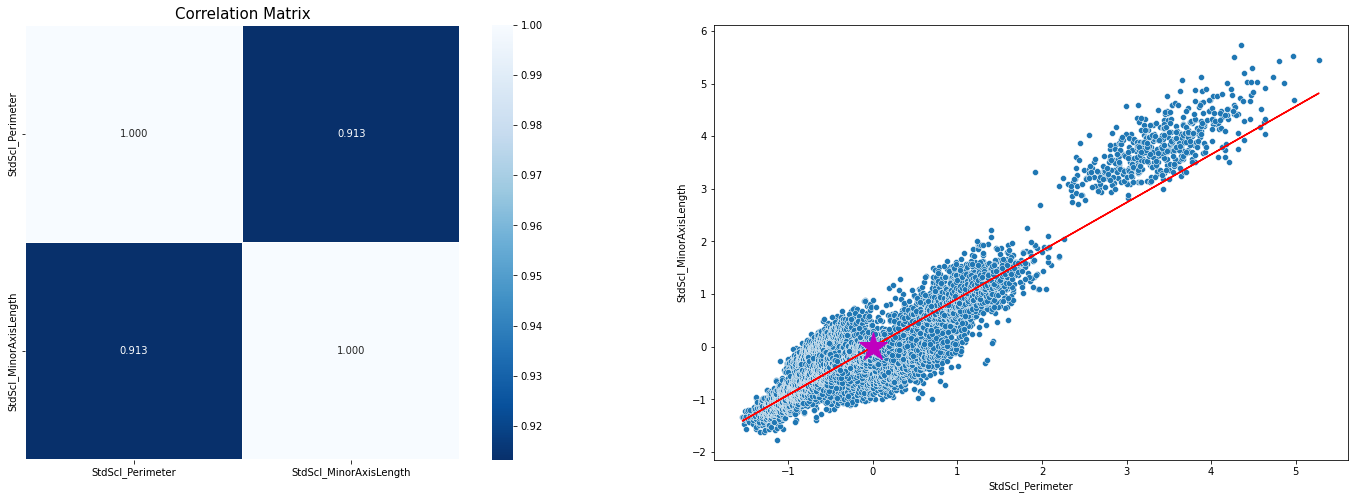

In [43]:
fig= plt.figure(figsize=(25,8))

fig.add_subplot(1,2,2)

sns.scatterplot(data=db_ml_Std, x='StdScl_Perimeter', y='StdScl_MinorAxisLength')
plt.plot(X,y_fit, color='red', )
plt.plot(mean_perimeter,mean_minorAxis, color='m',marker='*', markersize=30)

fig.add_subplot(1,2,1)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);
#plt.savefig('db_StdScl_ConfusionSeabornCodementor.png')
#plt.savefig(results_path + 'db_StdScl_perimeter_minorAx_fit.png')

# PCA 
(Principal Component Analysis)

## Vectors

### Area & MajorAxisLength

In [44]:
pca = decomposition.PCA()
pca.fit(db_ml_Std[['StdScl_Area','StdScl_MajorAxisLength']])

pca_loadings=pca.transform(db_ml_Std[['StdScl_Area','StdScl_MajorAxisLength']])

print('The PCA compoents (vectors) are:', pca.components_)

print('The shape of the loading matrix is {}'.format(pca_loadings. shape))

print('The first PC explains {} and second PC explins {} of all the varience.'.format(100*pca.explained_variance_ratio_[0],100*pca.explained_variance_ratio_[1]))

The PCA compoents (vectors) are: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
The shape of the loading matrix is (13611, 2)
The first PC explains 96.59167973564348 and second PC explins 3.408320264356504 of all the varience.


In [45]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v0, v1, arrowprops=arrowprops)

# plot data

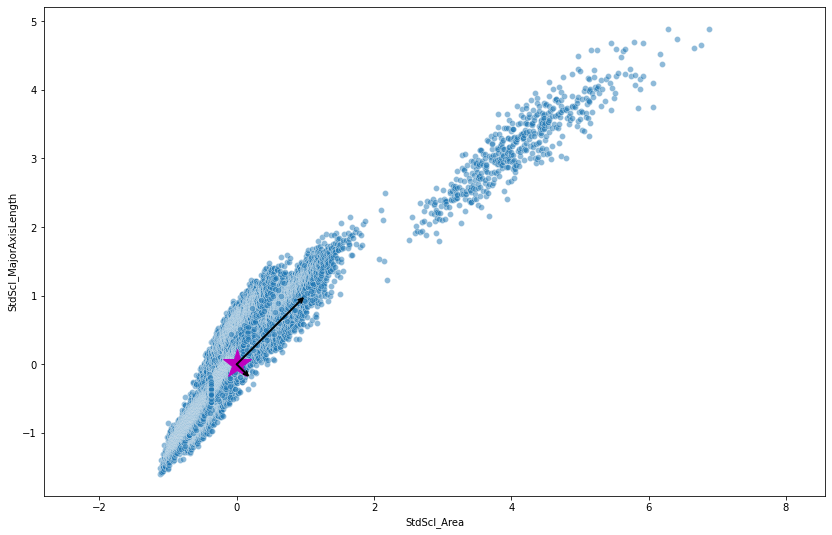

In [46]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=db_ml_Std, x= 'StdScl_Area',y ='StdScl_MajorAxisLength', alpha =0.5)

#plt.plot(X,y_fit, color='red', )
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector  * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

plt.show()

Text(0, 0.5, 'PCA 2')

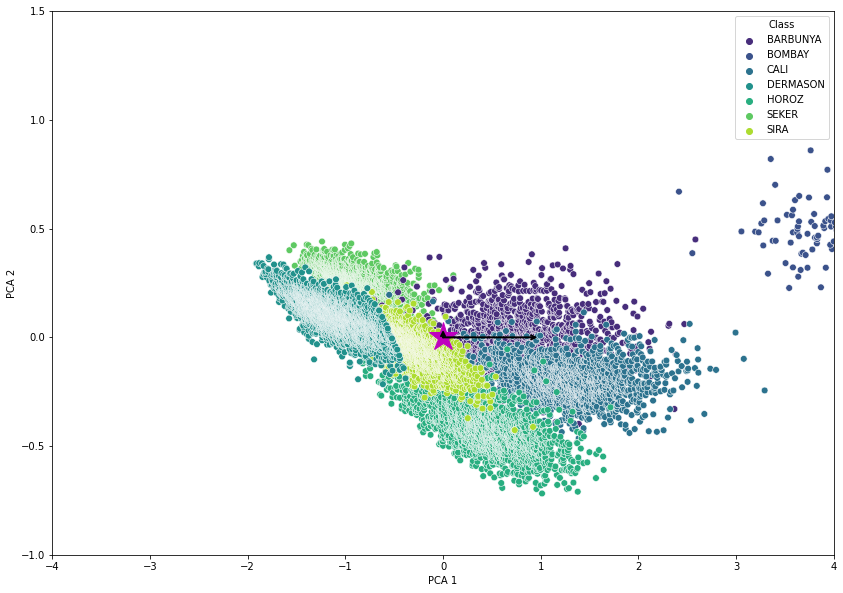

In [47]:
fig=plt.figure(figsize=(14,10))

fig.add_subplot(1,1,1)
sns.scatterplot(x=pca_loadings[:,0], y=pca_loadings[:,1],hue=db['Class'],palette='viridis', s=45)
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

draw_vector((0,0),(pca.explained_variance_ratio_[0],0))
draw_vector((0,0),(0,pca.explained_variance_ratio_[1]))

plt.xlim((-4,4))
plt.ylim((-1,1.5))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.xlabel('PCA 1 = {} * Mass + {} * Flipper'.format(np.round(pca.components_[0,0],2),np.round(pca.components_[0,1],2)))

### PCA plot

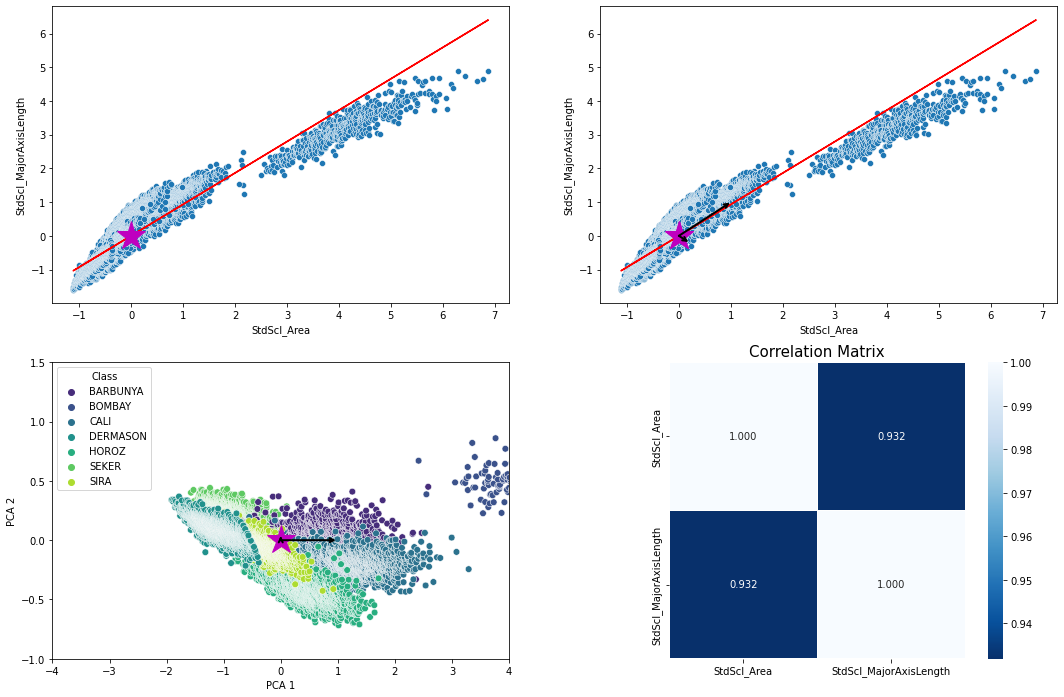

In [48]:
lin_reg_mdl=linear_model.LinearRegression()
X=db_ml_Std['StdScl_Area'].values.reshape(-1,1)
y=db_ml_Std['StdScl_MajorAxisLength']
lin_reg_mdl.fit(X,y)
y_fit=lin_reg_mdl.predict(X)


fig=plt.figure(figsize=(18,12))


fig.add_subplot(2,2,1)

sns.scatterplot(data=db_ml_Std, x='StdScl_Area', y='StdScl_MajorAxisLength')
plt.plot(X,y_fit, color='red', )
plt.plot(mean_perimeter,mean_minorAxis, color='m',marker='*', markersize=30)
mean_area=db_ml_Std['StdScl_Area'].mean()
mean_mj=db_ml_Std['StdScl_MajorAxisLength'].mean()


fig.add_subplot(2,2,2)

sns.scatterplot(data=db_ml_Std, x='StdScl_Area', y='StdScl_MajorAxisLength')
plt.plot(X,y_fit, color='red', )
plt.plot(mean_area,mean_mj, color='m',marker='*', markersize=30)
#plt.plot(X,y_fit, color='red', )
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector  * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

#plt.axis('equal');

fig.add_subplot(2,2,3)
sns.scatterplot(x=pca_loadings[:,0], y=pca_loadings[:,1],hue=db['Class'],palette='viridis', s=45)
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

draw_vector((0,0),(pca.explained_variance_ratio_[0],0))
draw_vector((0,0),(0,pca.explained_variance_ratio_[1]))

plt.xlim((-4,4))
plt.ylim((-1,1.5))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


fig.add_subplot(2,2,4)
cm = db_ml_Std[['StdScl_Area','StdScl_MajorAxisLength']].corr()

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);


plt.savefig(results_path +'pca_StdScl_Area_StdScl_MajorAxisLength.pdf')
plt.savefig(results_path + 'pca_StdScl_Area_StdScl_MajorAxisLength.png')

In [49]:
db_ml_Std.columns

Index(['StdScl_Area', 'StdScl_Perimeter', 'StdScl_MajorAxisLength',
       'StdScl_MinorAxisLength', 'StdScl_Eccentricity', 'StdScl_ConvexArea',
       'Class'],
      dtype='object')

#Full Correlation Matrix

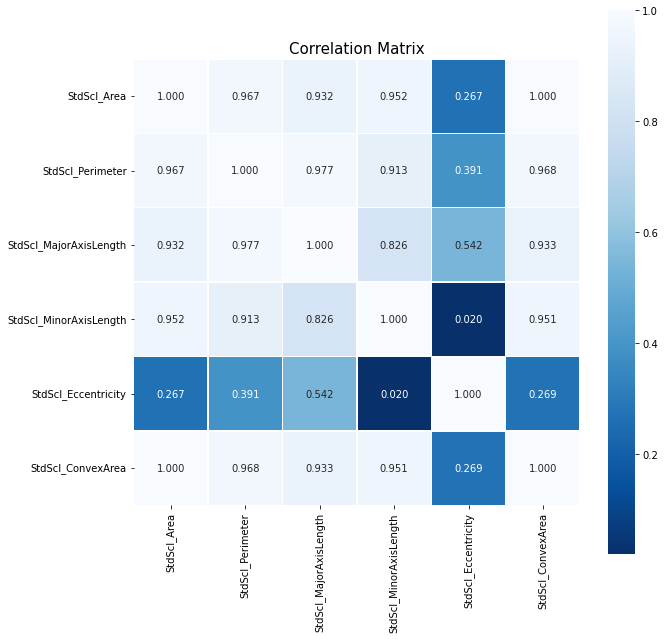

In [50]:
cm = db_ml_Std.corr()

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);
#plt.savefig('Penguins_species_ConfusionSeabornCodementor.png')

# 4D PCA

In [51]:
pca = decomposition.PCA()
pca_fit = pca.fit(db_ml_Std.iloc[:,:-3])

pca_loadings=pca.transform(db_ml_Std.iloc[:,:-3])

In [52]:
db_ml_Std_loadings=pd.DataFrame(pca_loadings, columns=['PCA1','PCA2','PCA3','PCA4'])

db_ml_Std_loadings['Class']=db_ml_Std['Class']

db_ml_Std_loadings.to_csv(results_path + 'db_ml_Std_4D_PCA.csv',sep=',',index=False)

In [53]:
pca_loadings.shape

(13611, 4)

## Scree plot

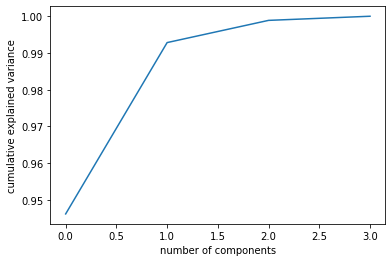

In [54]:
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

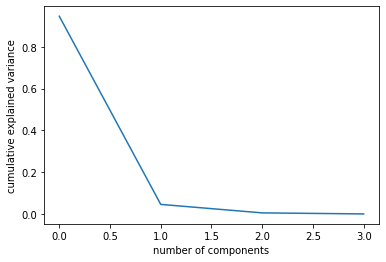

In [55]:
plt.plot(pca_fit.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
np.cumsum(pca_fit.explained_variance_ratio_)

array([0.94618641, 0.99282896, 0.99887549, 1.        ])

In [57]:
pca_fit.components_

array([[ 0.50873234,  0.50972851,  0.49372169,  0.48744963],
       [ 0.14858356, -0.22181073, -0.6375709 ,  0.72265225],
       [ 0.81638363, -0.46994945, -0.02559074, -0.33467955],
       [ 0.22941687,  0.68565615, -0.59083615, -0.35798908]])

In [58]:
pca_fit.explained_variance_

array([3.78502371, 0.18658391, 0.02418792, 0.00449836])

In [59]:
pca_fit.explained_variance_ratio_

array([0.94618641, 0.04664255, 0.00604654, 0.00112451])

<Figure size 1080x1080 with 0 Axes>

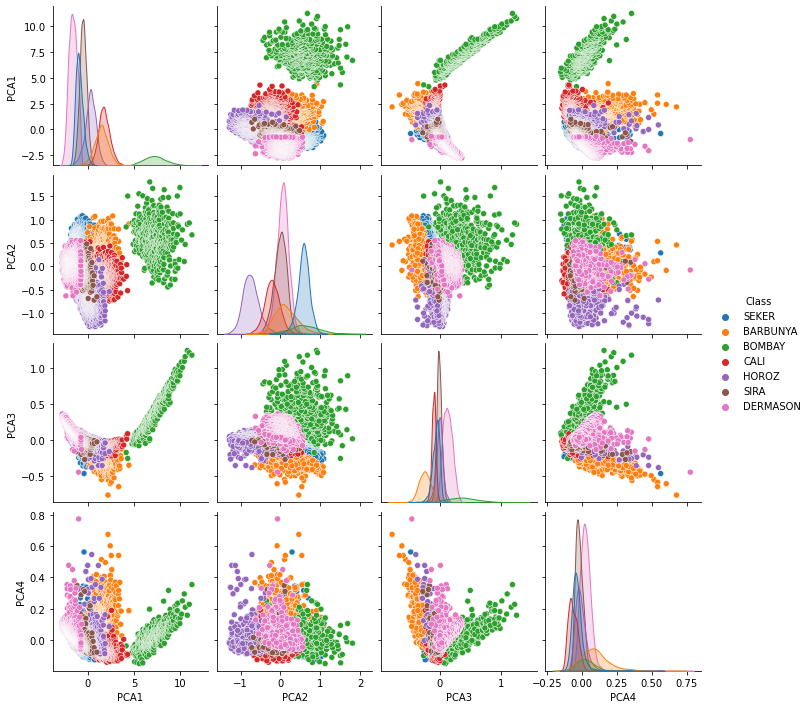

In [60]:
fig=plt.figure(figsize=(15,15))
sns.pairplot(data=db_ml_Std_loadings, hue='Class')
plt.savefig(results_path +'pca_pairplot.pdf')
plt.savefig(results_path + 'pca_pairplot.png')

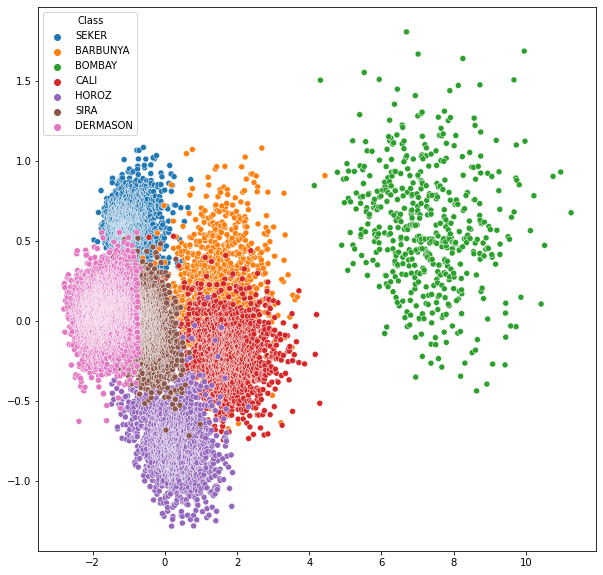

In [61]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(x=pca_loadings[:,0], y=pca_loadings[:,1], hue=db_ml_Std['Class'])
plt.savefig(results_path +'pca_1_2.pdf')
plt.savefig(results_path + 'pca_1_2.png')

# K- means Clustering
Scaled data

In [62]:
db_ml_Std.columns

Index(['StdScl_Area', 'StdScl_Perimeter', 'StdScl_MajorAxisLength',
       'StdScl_MinorAxisLength', 'StdScl_Eccentricity', 'StdScl_ConvexArea',
       'Class'],
      dtype='object')

In [63]:
db = db_ml_Std.copy()

In [64]:
km_clf = cluster.KMeans(n_clusters=7,  tol=1e-2, max_iter=100)
X = db.iloc[:,:6]

clusted_db=km_clf.fit(X)

clusted_db.labels_.shape

(13611,)

In [65]:
db['cluster_id_scaled']=clusted_db.labels_

## Area/MajorAxisLength

In [66]:
#StdScl_Area_StdScl_MajorAxisLength

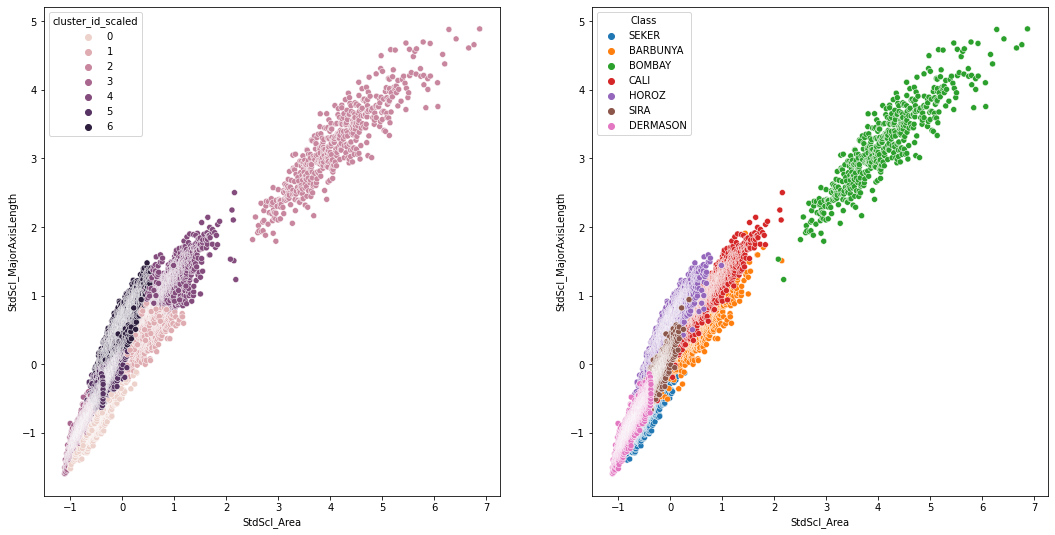

In [67]:
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
sns.scatterplot(data=db, x='StdScl_Area', y = 'StdScl_MajorAxisLength',hue='cluster_id_scaled' )

fig.add_subplot(1,2,2)
sns.scatterplot(data=db, x='StdScl_Area', y = 'StdScl_MajorAxisLength',hue='Class' )

In [68]:
db.loc[db['Class']=='SIRA', 'species_int'] = 0
db.loc[db['Class']=='BOMBAY', 'species_int']=1
db.loc[db['Class']=='BARBUNYA', 'species_int']=2
db.loc[db['Class']=='HOROZ', 'species_int'] = 3
db.loc[db['Class']=='DERMASON', 'species_int']=4
db.loc[db['Class']=='CALI', 'species_int']=5
db.loc[db['Class']=='SEKER', 'species_int']=6

[[  16    3    0  127    0 2337  153]
 [   0    0  520    0    2    0    0]
 [  11  836    0    0  373   71   31]
 [   0   13    0   15   36   88 1776]
 [  60    0    0 2946    0  540    0]
 [   1  455    0    0 1098    6   70]
 [1791    7    0   39    0  189    1]]


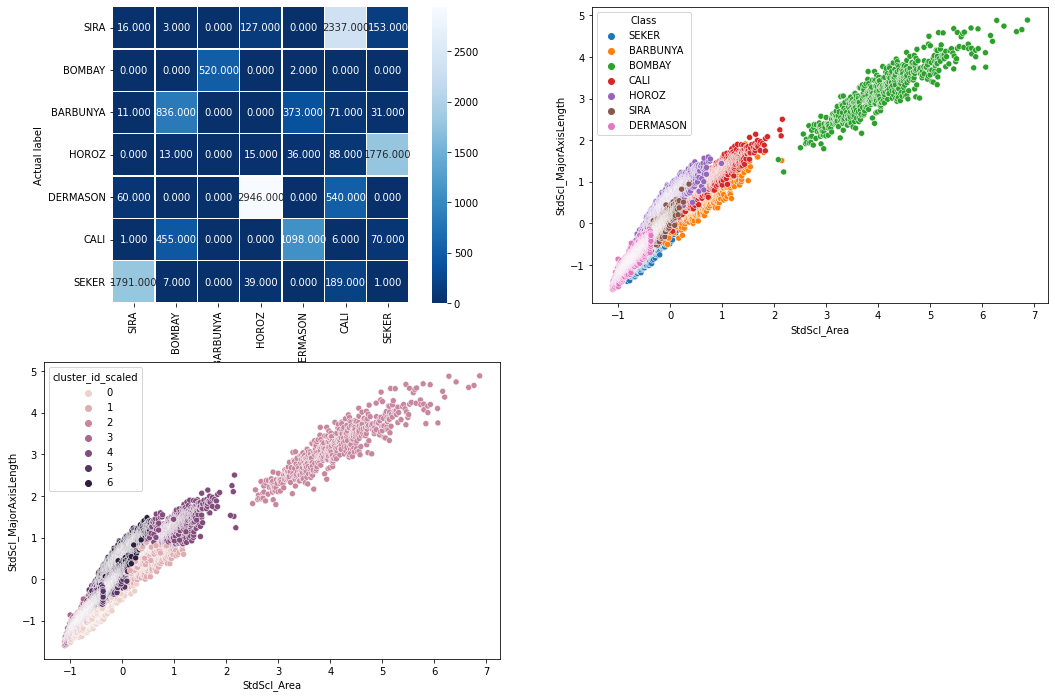

In [69]:
cm = metrics.confusion_matrix(db['species_int'], db['cluster_id_scaled'])
print(cm)


fig=plt.figure(figsize=(18,12))


fig.add_subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',
            xticklabels=['SIRA','BOMBAY','BARBUNYA','HOROZ','DERMASON','CALI','SEKER'],
            yticklabels=['SIRA','BOMBAY','BARBUNYA','HOROZ','DERMASON','CALI','SEKER']);
plt.ylabel('Actual label');
plt.xlabel('Derived / cluster label');

fig.add_subplot(2,2,3)
sns.scatterplot(data=db, x='StdScl_Area', y = 'StdScl_MajorAxisLength',hue='cluster_id_scaled' )

fig.add_subplot(2,2,2)
sns.scatterplot(data=db, x='StdScl_Area', y = 'StdScl_MajorAxisLength',hue='Class' )
plt.savefig(results_path +'k_means.pdf')
plt.savefig(results_path + 'k_means.png')